# Análisis Exploratorio de Datos (EDA) - Predicción de Churn

Este notebook realiza un análisis exhaustivo del dataset de churn de clientes.


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Librerías importadas correctamente")


Librerías importadas correctamente


## 1. Carga del Dataset


In [2]:
# Cargar el dataset
df = pd.read_csv('../data/churn_data.csv')

print(f"Dimensiones del dataset: {df.shape}")
print(f"\nPrimeras filas:")
df.head()


Dimensiones del dataset: (7042, 9)

Primeras filas:


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Información general del dataset
print("Información del dataset:")
print(df.info())
print("\n" + "="*60)
print("\nEstadísticas descriptivas:")
df.describe()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB
None


Estadísticas descriptivas:


,tenure,MonthlyCharges
count,7042.000000,7042.000000
mean,32.366373,64.755886
std,24.557955,30.088238
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


## 2. Limpieza de Datos


In [4]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print("\n" + "="*60)

# Verificar duplicados
print(f"\nFilas duplicadas: {df.duplicated().sum()}")


Valores nulos por columna:
customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Filas duplicadas: 0


In [5]:
# Limpiar datos
df_clean = df.copy()

# Convertir TotalCharges a numérico
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Verificar valores nulos después de la conversión
print("Valores nulos después de conversión:")
print(df_clean.isnull().sum())

# Rellenar valores nulos en TotalCharges con 0 (clientes nuevos)
df_clean['TotalCharges'] = df_clean['TotalCharges'].fillna(0)

# Eliminar filas con valores nulos críticos
df_clean = df_clean.dropna(subset=['tenure', 'MonthlyCharges'])

print(f"\nDimensiones después de limpieza: {df_clean.shape}")
print(f"Filas eliminadas: {df.shape[0] - df_clean.shape[0]}")


Valores nulos después de conversión:
customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Dimensiones después de limpieza: (7042, 9)
Filas eliminadas: 0


## 3. Análisis de Variables


Distribución de Churn:
Churn
No     5173
Yes    1869
Name: count, dtype: int64

Porcentajes:
Churn
No     73.459245
Yes    26.540755
Name: proportion, dtype: float64


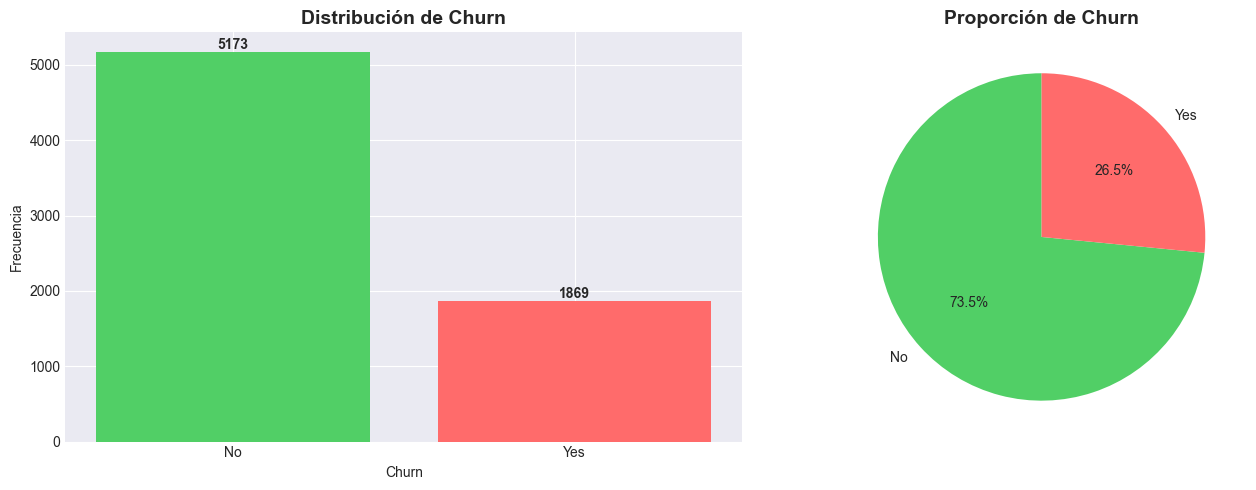

In [6]:
# Distribución de la variable objetivo
churn_counts = df_clean['Churn'].value_counts()
churn_percentages = df_clean['Churn'].value_counts(normalize=True) * 100

print("Distribución de Churn:")
print(churn_counts)
print("\nPorcentajes:")
print(churn_percentages)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(churn_counts.index, churn_counts.values, color=['#51cf66', '#ff6b6b'])
axes[0].set_title('Distribución de Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Frecuencia')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
            colors=['#51cf66', '#ff6b6b'], startangle=90)
axes[1].set_title('Proporción de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


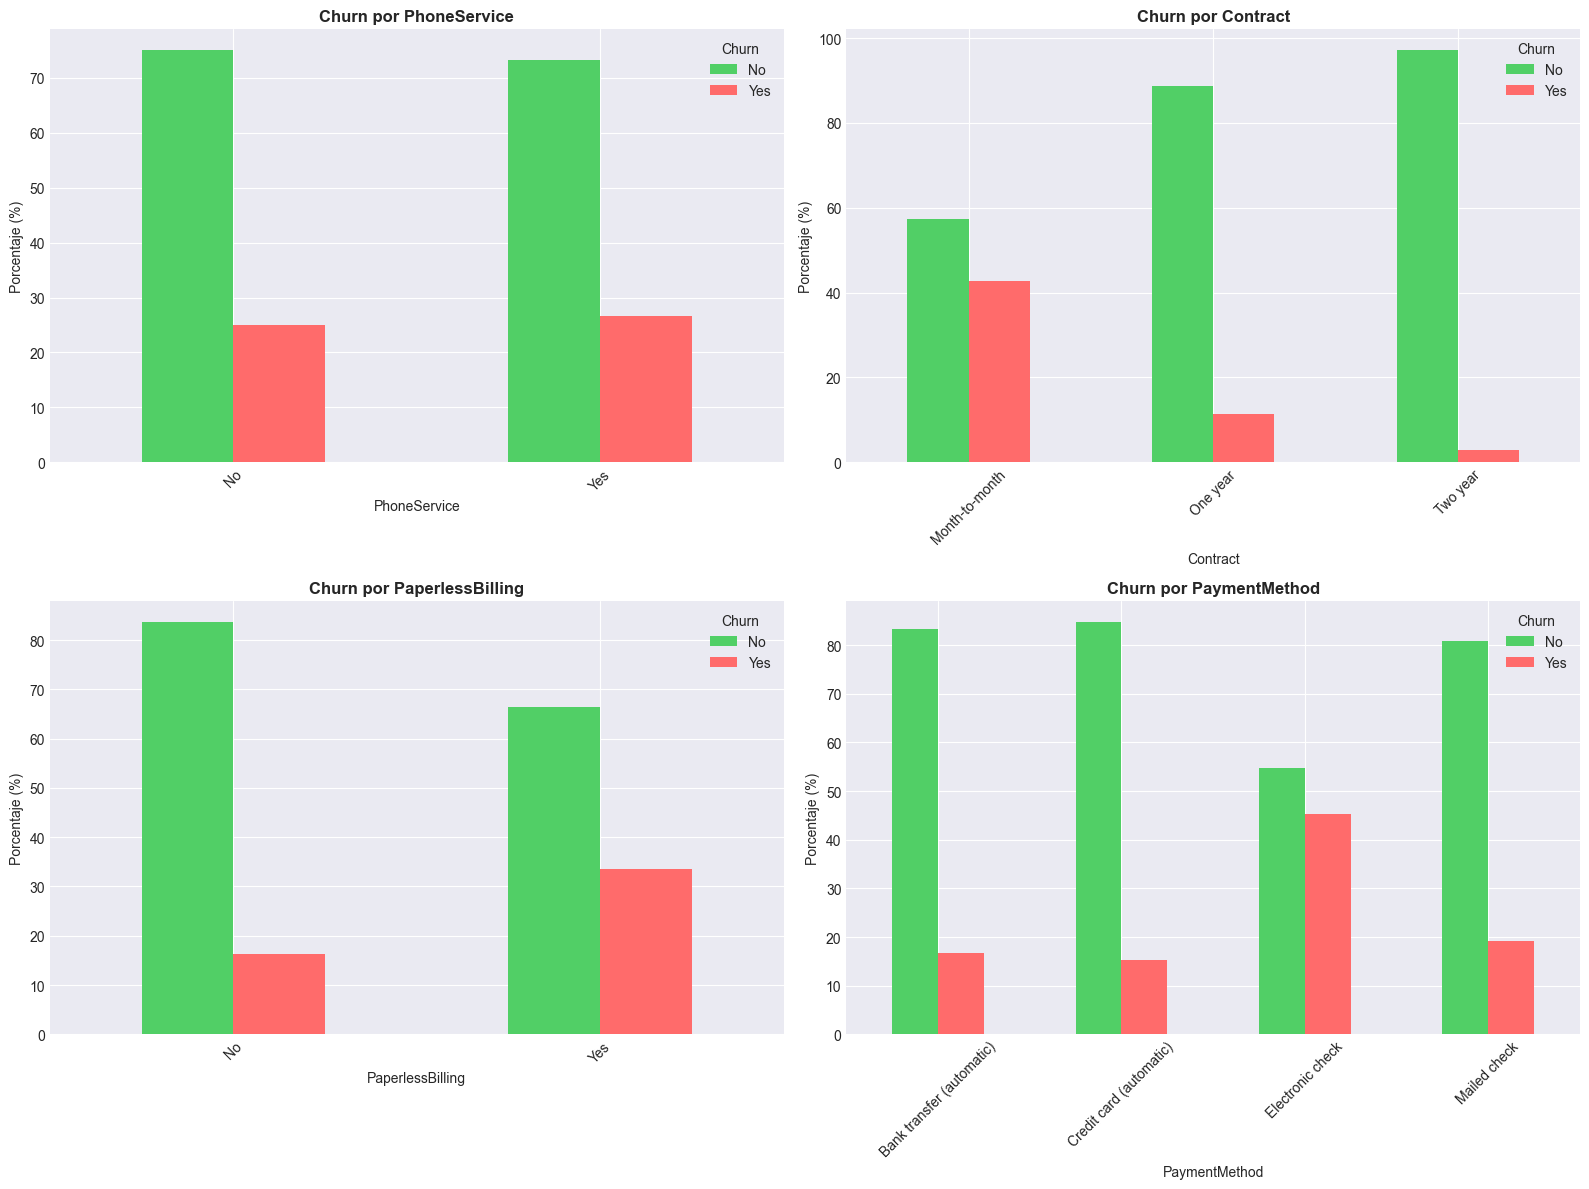

In [7]:
# Análisis de variables categóricas
categorical_vars = ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, var in enumerate(categorical_vars):
    # Tabla de contingencia con Churn
    crosstab = pd.crosstab(df_clean[var], df_clean['Churn'], normalize='index') * 100
    
    # Visualización
    crosstab.plot(kind='bar', ax=axes[idx], color=['#51cf66', '#ff6b6b'])
    axes[idx].set_title(f'Churn por {var}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Porcentaje (%)')
    axes[idx].legend(title='Churn')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


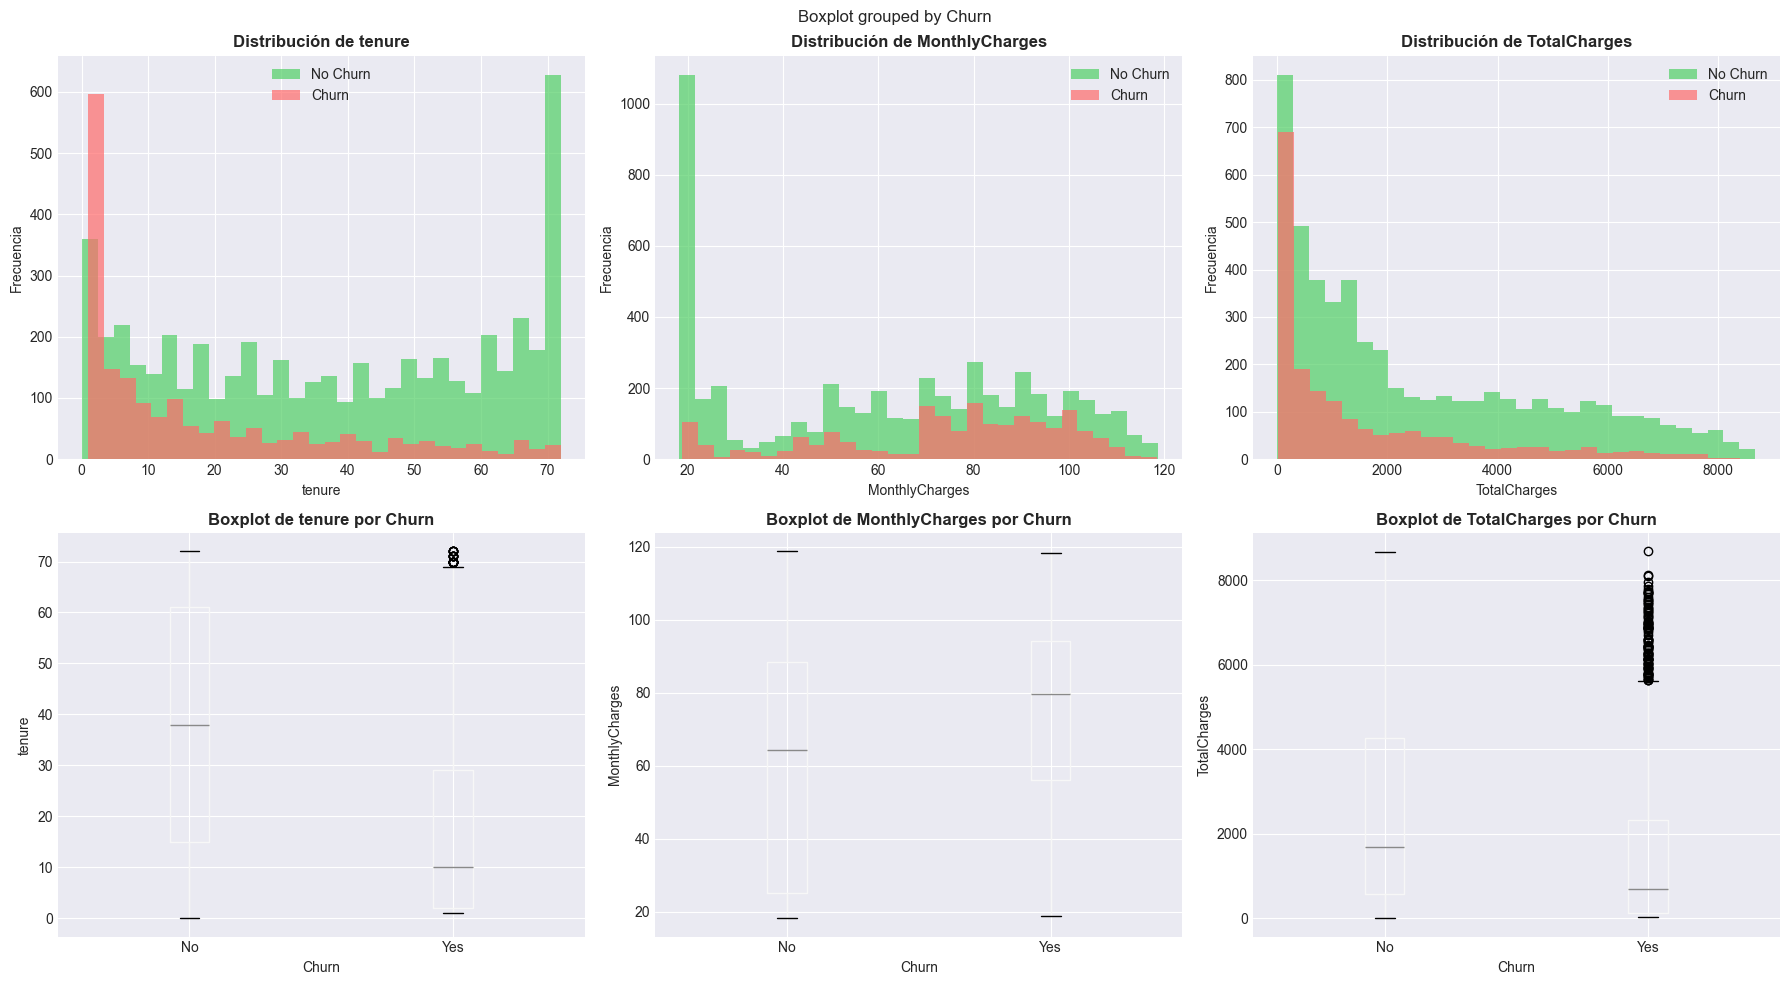

In [8]:
# Análisis de variables numéricas
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, var in enumerate(numerical_vars):
    # Distribución por Churn
    df_clean[df_clean['Churn'] == 'No'][var].hist(ax=axes[0, idx], alpha=0.7, label='No Churn', color='#51cf66', bins=30)
    df_clean[df_clean['Churn'] == 'Yes'][var].hist(ax=axes[0, idx], alpha=0.7, label='Churn', color='#ff6b6b', bins=30)
    axes[0, idx].set_title(f'Distribución de {var}', fontweight='bold')
    axes[0, idx].set_xlabel(var)
    axes[0, idx].set_ylabel('Frecuencia')
    axes[0, idx].legend()
    
    # Boxplot
    df_clean.boxplot(column=var, by='Churn', ax=axes[1, idx])
    axes[1, idx].set_title(f'Boxplot de {var} por Churn', fontweight='bold')
    axes[1, idx].set_xlabel('Churn')
    axes[1, idx].set_ylabel(var)

plt.tight_layout()
plt.show()


In [9]:
# Estadísticas descriptivas por Churn
print("Estadísticas descriptivas por grupo de Churn:")
print("="*60)
for var in numerical_vars:
    print(f"\n{var}:")
    print(df_clean.groupby('Churn')[var].describe())


Estadísticas descriptivas por grupo de Churn:

tenure:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5173.0  37.564469  24.112867  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

MonthlyCharges:
        count       mean        std    min    25%    50%   75%     max
Churn                                                                 
No     5173.0  61.256544  31.089527  18.25  25.10  64.40  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.65  94.2  118.35

TotalCharges:
        count         mean          std    min     25%      50%     75%  \
Churn                                                                     
No     5173.0  2549.081249  2329.413995   0.00  572.85  1679.40  4261.2   
Yes    1869.0  1531.796094  1890.822994  18.85  134.50   703.55  2331.3   

           max  
Churn           
No     8672.45  
Yes    8684.80  


## 4. Análisis de Correlaciones


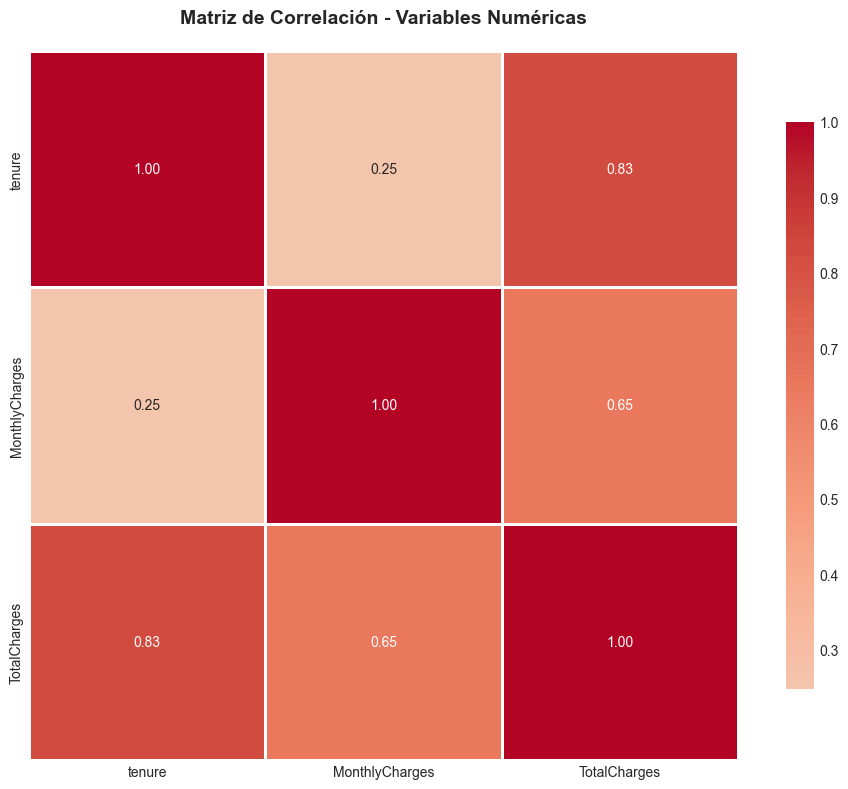

In [10]:
# Matriz de correlación para variables numéricas
correlation_matrix = df_clean[numerical_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 5. Insights del Churn


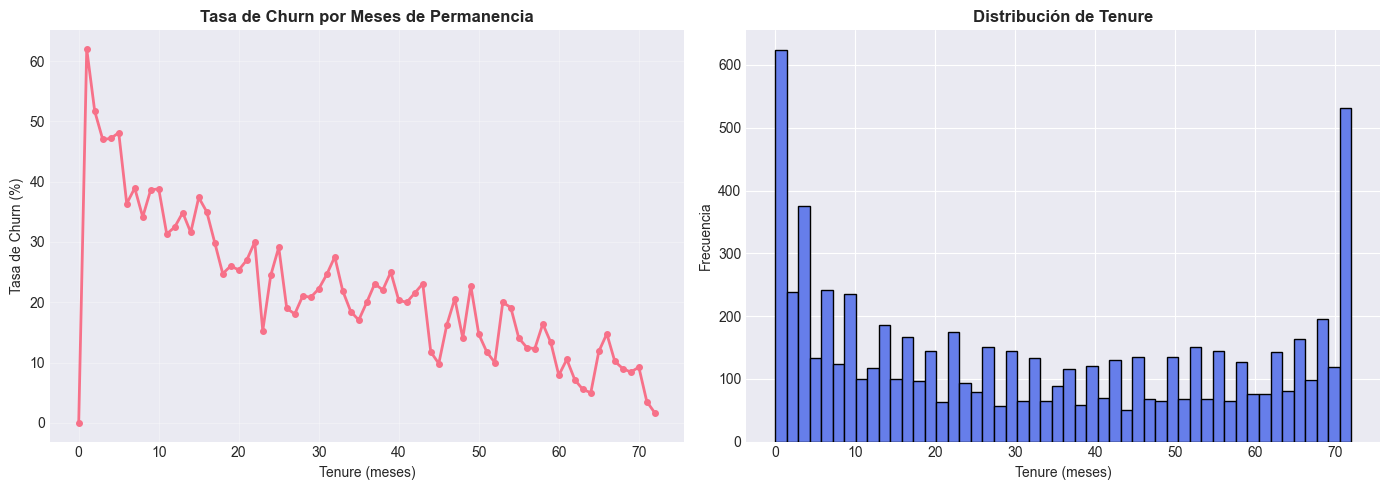


Tasa de churn promedio: 26.54%
Tenure promedio (No Churn): 37.56 meses
Tenure promedio (Churn): 17.98 meses


In [11]:
# Análisis de Tenure (meses de permanencia)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn rate por tenure
tenure_churn = df_clean.groupby('tenure')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
axes[0].plot(tenure_churn.index, tenure_churn.values, marker='o', linewidth=2, markersize=4)
axes[0].set_title('Tasa de Churn por Meses de Permanencia', fontweight='bold')
axes[0].set_xlabel('Tenure (meses)')
axes[0].set_ylabel('Tasa de Churn (%)')
axes[0].grid(True, alpha=0.3)

# Distribución de tenure
df_clean['tenure'].hist(bins=50, ax=axes[1], color='#667eea', edgecolor='black')
axes[1].set_title('Distribución de Tenure', fontweight='bold')
axes[1].set_xlabel('Tenure (meses)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print(f"\nTasa de churn promedio: {(df_clean['Churn'] == 'Yes').sum() / len(df_clean) * 100:.2f}%")
print(f"Tenure promedio (No Churn): {df_clean[df_clean['Churn'] == 'No']['tenure'].mean():.2f} meses")
print(f"Tenure promedio (Churn): {df_clean[df_clean['Churn'] == 'Yes']['tenure'].mean():.2f} meses")


In [12]:
# Resumen de insights clave
print("="*60)
print("INSIGHTS CLAVE DEL ANÁLISIS DE CHURN")
print("="*60)

print("\n1. DISTRIBUCIÓN GENERAL:")
print(f"   - Total de clientes: {len(df_clean)}")
print(f"   - Clientes con Churn: {(df_clean['Churn'] == 'Yes').sum()} ({(df_clean['Churn'] == 'Yes').sum() / len(df_clean) * 100:.2f}%)")
print(f"   - Clientes sin Churn: {(df_clean['Churn'] == 'No').sum()} ({(df_clean['Churn'] == 'No').sum() / len(df_clean) * 100:.2f}%)")

print("\n2. VARIABLES CATEGÓRICAS:")
for var in categorical_vars:
    churn_rates = df_clean.groupby(var)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    print(f"\n   {var}:")
    for category, rate in churn_rates.items():
        print(f"      - {category}: {rate:.2f}%")

print("\n3. VARIABLES NUMÉRICAS:")
print(f"   - Tenure promedio (Churn): {df_clean[df_clean['Churn'] == 'Yes']['tenure'].mean():.2f} meses")
print(f"   - Tenure promedio (No Churn): {df_clean[df_clean['Churn'] == 'No']['tenure'].mean():.2f} meses")
print(f"   - MonthlyCharges promedio (Churn): ${df_clean[df_clean['Churn'] == 'Yes']['MonthlyCharges'].mean():.2f}")
print(f"   - MonthlyCharges promedio (No Churn): ${df_clean[df_clean['Churn'] == 'No']['MonthlyCharges'].mean():.2f}")

print("\n" + "="*60)


INSIGHTS CLAVE DEL ANÁLISIS DE CHURN

1. DISTRIBUCIÓN GENERAL:
   - Total de clientes: 7042
   - Clientes con Churn: 1869 (26.54%)
   - Clientes sin Churn: 5173 (73.46%)

2. VARIABLES CATEGÓRICAS:

   PhoneService:
      - No: 24.93%
      - Yes: 26.71%

   Contract:
      - Month-to-month: 42.71%
      - One year: 11.27%
      - Two year: 2.83%

   PaperlessBilling:
      - No: 16.33%
      - Yes: 33.57%

   PaymentMethod:
      - Bank transfer (automatic): 16.72%
      - Credit card (automatic): 15.24%
      - Electronic check: 45.29%
      - Mailed check: 19.11%

3. VARIABLES NUMÉRICAS:
   - Tenure promedio (Churn): 17.98 meses
   - Tenure promedio (No Churn): 37.56 meses
   - MonthlyCharges promedio (Churn): $74.44
   - MonthlyCharges promedio (No Churn): $61.26



In [14]:
# Guardar dataset limpio (opcional, para uso en entrenamiento)
df_clean.to_csv('../data/churn_data_clean.csv', index=False)
print("EDA completado. Dataset listo para modelado.")


EDA completado. Dataset listo para modelado.
